Local Coordinates Bases on Normal vector
==================

The goal of this notebook is to compute the bases of a local coordinate system
based on its normal vector.

The figure below shows the normal vector and the plane associated with it.

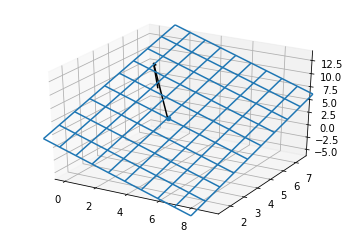

In [88]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

def plot_plane(N):
    ''' plot a plane and its normal
    '''
    point = np.array([4,4,4])
    normal = normalize(N)

    # a plane is a*x+b*y+c*z+d=0
    # [a,b,c] is the normal. Thus, we have to calculate
    # d and we're set
    d = -point.dot(normal)

    # create x,y
    
    xx, yy = np.meshgrid(range(10), range(10))

    # calculate corresponding z
    z = (-normal[0] * xx - normal[1] * yy - d) * 1. /normal[2]

    # plot the surface
    fig  = plt.figure()
    ax = fig.gca(projection='3d')
    #plt3d.plot_surface(xx, yy, z)
    ax.plot_wireframe(xx, yy, z)
    
    x = point[0]
    y = point[1]
    z = point[2]
    u = 0.0*point[0] - normal[0]
    v = 0.0*point[1] - normal[1]
    w = 0.0*point[2] - normal[2]
    ax.scatter(x,y,z)
    ax.quiver(x, y, z, u, v, w, length=20, normalize = True, color = 'black')
    plt.axis('equal')
    plt.show()

plot_plane(N)   

In [89]:
import numpy as np

def LocalCoord(N):
    ''' Find the a local coordinate system
    given a a normal vector
    
    argument :
        N : np.array
            normal vector
    return 
        bases vector of a local coord system
    '''
    v1 = N
    v2 = np.array([-N[1]/N[0],1.,0.])
    v3 = np.array([-N[2]/N[0],0.,1.])
    
    A = np.array([v1,v2,v3])
    n = len(bases)

    A[0,:] = normalize(A[0,:])

    for i in range(1, n):
        Ai = A[i,:]
        for j in range(0, i):
            Aj = A[j,:]
            t = Ai.dot(Aj)
            Ai = Ai - t * Aj
        A[i,:] = normalize(Ai)
    
    return A

def normalize(v):
    return v / np.linalg.norm(v)



N = np.array([1., -1., 1.])
bases =  LocalCoord(N)

# test
print('Bases times Normal vector, = ', bases.dot(normalize(N)))


print('Orthonomal bases =\n' , bases.dot(bases.T))

Bases times Normal vector, =  [1. 0. 0.]
Orthonomal bases =
 [[ 1.00000000e+00 -1.77961928e-17  2.21943272e-17]
 [-1.77961928e-17  1.00000000e+00 -1.03018891e-16]
 [ 2.21943272e-17 -1.03018891e-16  1.00000000e+00]]
